# Wildfire Analysis

In [1]:
%pip install kagglehub

  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
  Using cached pyyaml-6.0.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-macosx_10_13_universal2.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)
Using cached pyyaml-6.0.3-cp313-cp313-macosx_11_0_arm64.whl (173 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.3-cp313-cp313-macosx_10_13_universal2.whl (205 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached certifi-2025.10.5-py3-none-any.whl (163 kB)
Using cached tqd

In [4]:
import os
import pandas as pd

[Link to Kaggle](https://www.kaggle.com/datasets/firecastrl/us-wildfire-dataset)

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("firecastrl/us-wildfire-dataset")
df = pd.read_csv(os.path.join(path, "Wildfire_Dataset.csv"))

/Users/timwalewangko/Desktop/School/personal_portfolio/personal_porfolio/Kaggle Analysis/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Purpose
The point of this excercise is to pick a kaggle dataset and try to come up with hypotheses.

We will then explore the data and see if we are right or wrong.

## Hypotheses

* Wildfires are becoming more frequent. There are more wildfires happening per year.
* Humidity is lower, and the fuel is more dry.
* Daily Temperatures are higher, and precipitation is lower than before.

In [8]:
# Let's see what we got going on here
df

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.128431,-97.276685,2018-08-15,No,0.0,78.6,14.9,0.00582,272.6,282.0,301.6,3.0,40.0,10.2,12.2,54.0,7.5,5.5,1.59
1,48.128431,-97.276685,2018-08-16,No,0.0,80.4,13.9,0.00676,264.0,283.9,304.9,3.0,40.0,9.7,12.0,56.0,8.2,5.9,1.93
2,48.128431,-97.276685,2018-08-17,No,0.0,70.9,20.4,0.00672,265.6,285.8,300.7,3.1,40.0,9.2,11.9,56.0,7.2,5.3,1.51
3,48.128431,-97.276685,2018-08-18,No,5.0,65.2,19.4,0.00756,261.4,289.0,303.3,5.1,0.0,9.9,12.0,40.0,10.0,6.9,1.85
4,48.128431,-97.276685,2018-08-19,No,0.0,100.0,42.2,0.00895,166.8,283.8,296.5,4.7,41.0,11.8,12.1,47.0,4.6,3.4,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509920,37.920118,-120.413184,2017-01-31,No,0.0,85.1,36.7,0.00493,142.1,277.3,290.9,3.1,23.0,13.5,25.5,18.0,3.3,2.2,0.66
9509921,37.920118,-120.413184,2017-02-01,No,3.6,82.9,42.0,0.00604,113.2,280.7,292.2,4.3,0.0,13.8,25.0,10.0,3.9,2.5,0.68
9509922,37.920118,-120.413184,2017-02-02,No,6.4,93.1,67.0,0.00764,35.7,282.5,289.0,8.7,0.0,16.0,25.1,8.0,2.5,1.6,0.29
9509923,37.920118,-120.413184,2017-02-03,No,11.9,87.9,62.0,0.00767,73.7,283.4,290.2,8.0,0.0,19.0,25.9,5.0,3.2,2.1,0.39


Here is the descriptions from kaggle:

>All variables are standardized to consistent units in this release:

    Precipitation (pr): mm/day

    Relative humidity (rmax/rmin): %

    Specific humidity (sph): kg/kg

    Solar radiation (srad): W/m²

    Temperatures (tmmn/tmmx): °C

    Wind speed (vs): m/s

    Vapor pressure deficit (vpd): kPa

    Fuel moisture indices (fm100/fm1000): %

    Energy release component (erc): index

    Burning index (bi): index

    Evapotranspiration (etr, pet): mm/day

And with that, lets get into the analysis

### H1: Wildfires are becoming more frequent
We have to calculate wildfires per year to show if it is increasing or decreasing.

<Axes: title={'center': 'Wildfire Ignitions by Year'}, xlabel='year'>

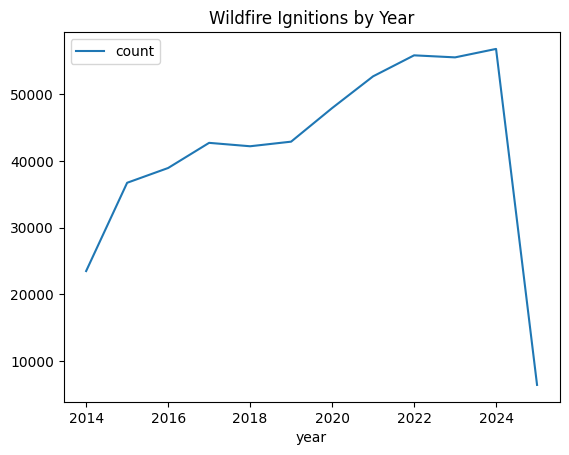

In [10]:
# make sure date column is datetime
# use this to extract year for aggregation
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year

# group by and use value counts
yearly_rate = df.groupby(by="year")["Wildfire"].value_counts().reset_index()
yearly_rate = yearly_rate[yearly_rate["Wildfire"] == "Yes"]

# time to plot!
yearly_rate.set_index(keys="year").drop(columns="Wildfire").plot(
    title="Wildfire Ignitions by Year"
)

### Analysis H1
It looks like our analysis is correct. There is a sharp drop off in 2025 however.

This could be due to a variety of reasons, most likely due to less data since the year is not over yet.

Lets check which one it is.


Max Date: 2025-04-13


<Axes: title={'center': 'Row Counts by Year'}, xlabel='year'>

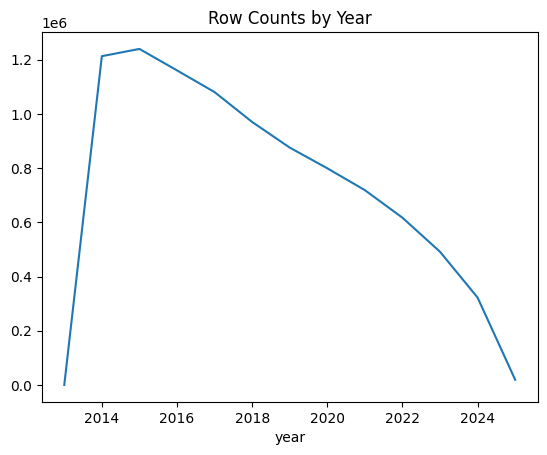

In [11]:
print(f'Max Date: {df["datetime"].max().date()}')
df.groupby(by="year")["datetime"].count().plot(title="Row Counts by Year")

It looks like the row counts do drop by year.

Lets remove 2025 and re-plot

<Axes: title={'center': 'Wildfire Ignitions by Year'}, xlabel='year'>

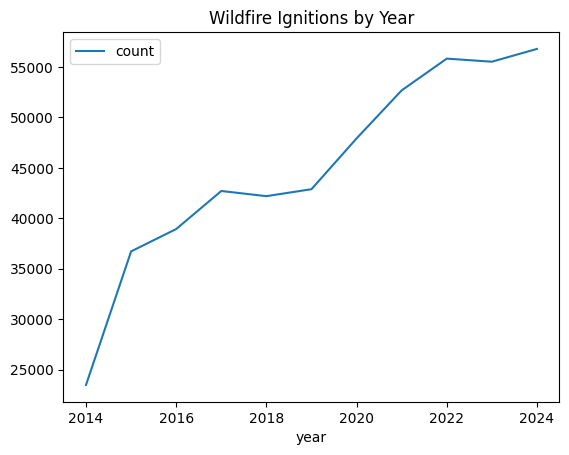

In [12]:
# group by and use value counts
df_clean = df[df["datetime"] <= "2024-12-31"]
yearly_rate_clean = df_clean.groupby(by="year")["Wildfire"].value_counts().reset_index()
yearly_rate_clean = yearly_rate_clean[yearly_rate_clean["Wildfire"] == "Yes"]

# time to plot!
yearly_rate_clean.set_index(keys="year").drop(columns="Wildfire").plot(
    title="Wildfire Ignitions by Year"
)

### Analysis H1
That looks better! Let's continue.

### H2: Humidity is lower, and the fuel is more dry
We are going to use some fancy indices for this; here is a blurb about fm100/fm1000-

```For wildfire management, the 100-hour (fm100) and 1,000-hour (fm1000) fuel moisture indices represent the percentage of water content in dead fuels of specific sizes. The lower the percentage, the drier and more flammable the fuel. ```

To test our hypothesis for humidity, we will be using rmax in the data set. This is described as-

```Max daily relative humidity```

In [13]:
df_clean.groupby("year")[["fm100", "fm1000", "rmax"]].mean()

,fm100,fm1000,rmax
year,,,
2013,15.257143,17.330612,80.424490
2014,82.886744,84.520263,144.821882
2015,63.223341,64.948041,126.534753
2016,75.509906,77.319567,139.763429
2017,65.773272,67.674015,129.506401
2018,98.115795,99.735700,161.038907
2019,86.267468,88.285099,151.883139
2020,121.796403,123.494144,183.968014
2021,130.456280,131.787229,192.254682


This doesn't look like what we would expect. After doing some more research we see the below-


>A single, aggregated average FM100 value is generally not practical for real-time wildfire risk assessment due to the following limitations:

    Obscures seasonal trends: FM100 fluctuates seasonally, decreasing during dry periods and increasing after rain. Averaging these values would mask the specific dry periods when wildfire risk is high.

    Hides critical extremes: The most important information for fire behavior is the low-end moisture content, which an average would conceal.

    FM100 already indicates longer trends: The FM100 value itself is already a modeled reflection of longer-term weather, making a further average less useful for short-term fire behavior predictions.

Lets work with mins per time period

<Axes: title={'center': 'Min Fuel Moisture Content and Relative Humidity'}, xlabel='year'>

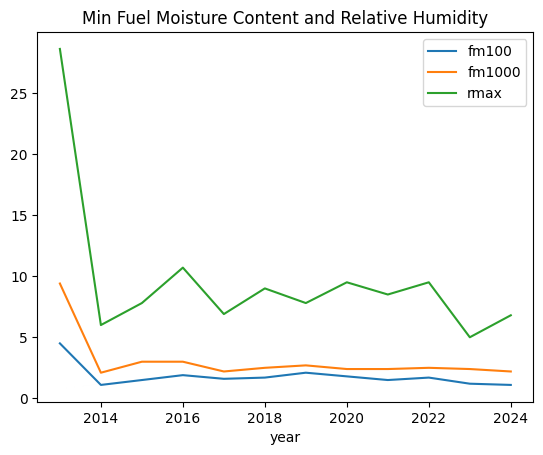

In [14]:
df_clean.groupby("year")[["fm100", "fm1000", "rmax"]].min().plot(
    title="Min Fuel Moisture Content and Relative Humidity"
)

### Analysis H2
This plot makes it harder to read.

Other than one year in 2023 for humidity, the other datapoints seem to say that these values are staying relatively constant
However, now it looks like there are values pre-2014 that don't follow the trend.
The dataset is called ```US Wildfire Dataset (2014-2025)``` , so lets trim off those early values.

<Axes: title={'center': 'Min Fuel Moisture Content and Relative Humidity'}, xlabel='year'>

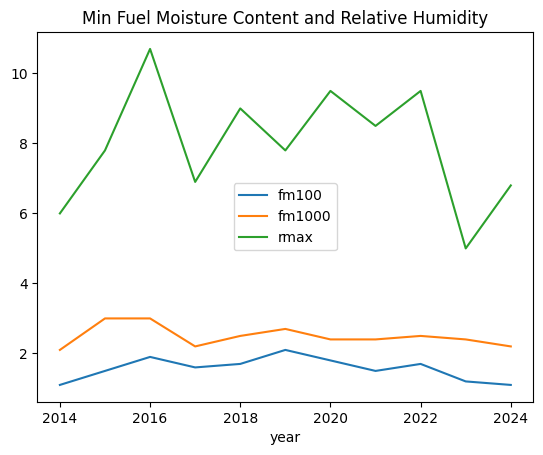

In [15]:
df_clean = df_clean[df_clean["datetime"] >= "2014-01-01"]
df_clean.groupby("year")[["fm100", "fm1000", "rmax"]].min().plot(
    title="Min Fuel Moisture Content and Relative Humidity"
)

Looking at it this way, now it does seem like there is a new trend appearing in 2023.

Hard to say without more data, but lower trend could be appearing.

### H3: Daily Temperatures are higher, and precipitation is lower than before.
Let's do something similar to the previous analysis, but with temperature and precipitation now.

<Axes: title={'center': 'Total Precipitation by Year'}, xlabel='year'>

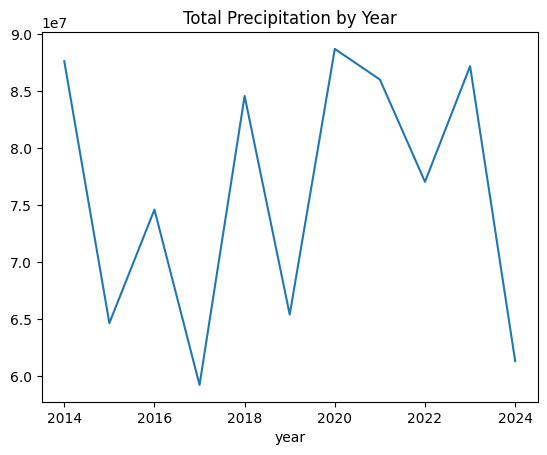

In [16]:
df_clean.groupby("year")["pr"].sum().plot(title="Total Precipitation by Year")

<Axes: title={'center': 'Average Max Daily Temperature by Year'}, xlabel='year'>

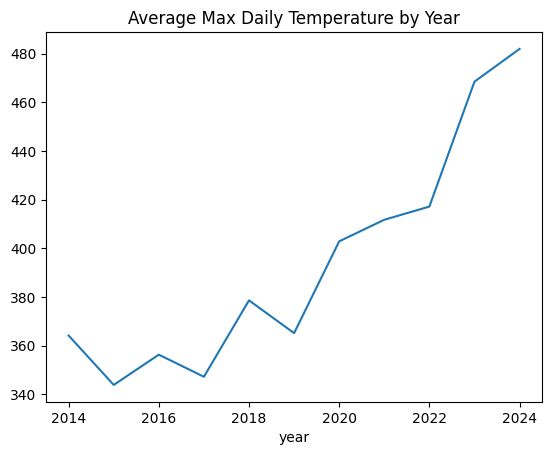

In [17]:
df_clean.groupby("year")["tmmx"].mean().plot(
    title="Average Max Daily Temperature by Year"
)

### Analysis H3
Total precipitation by year doesn't seem to tell the whole story.

I believe that average temperature is much more telling, we see that it is trending up like wildfire ignitions.

The kaggle notes say that this is supposed to be celcius, but averages on the website seem to tell a similar story.

# Summary
* Wildfires are becoming more frequent. There are more wildfires happening per year.
    * This appears to be true, there are more ignitions in this dataset as the years go on.
* Humidity is lower, and the fuel is more dry.
    * The data does not seem to support this at this time. Humidity seems to be starting a new trend (lower) as of 2023, but time will tell.
* Daily Temperatures are higher, and precipitation is lower than before.
    * Daily temperatures are certainly higher, but precipitation is all over the place. It seems as if the amount of rain is not correlated to the amount of wildfires.

Source : `Spatiotemporal Wildfire Prediction and Reinforcement Learning for Helitack Suppression, ICMLA 2025.`